In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

In [2]:
usMovieDF = pd.read_pickle('data/us_movies.pkl')

### Split Numeric and Categorical Data

In [3]:
print(usMovieDF.dtypes.value_counts())

int64             25
object             6
datetime64[ns]     4
float64            1
dtype: int64


In [58]:
movie_numeric = usMovieDF.select_dtypes(include=['int64','float64'])
movie_categories = usMovieDF.select_dtypes(exclude=['int64','float64'])

In [59]:
movie_numeric.columns.tolist()

['box_office',
 'budget',
 'runtime',
 'user_rating',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

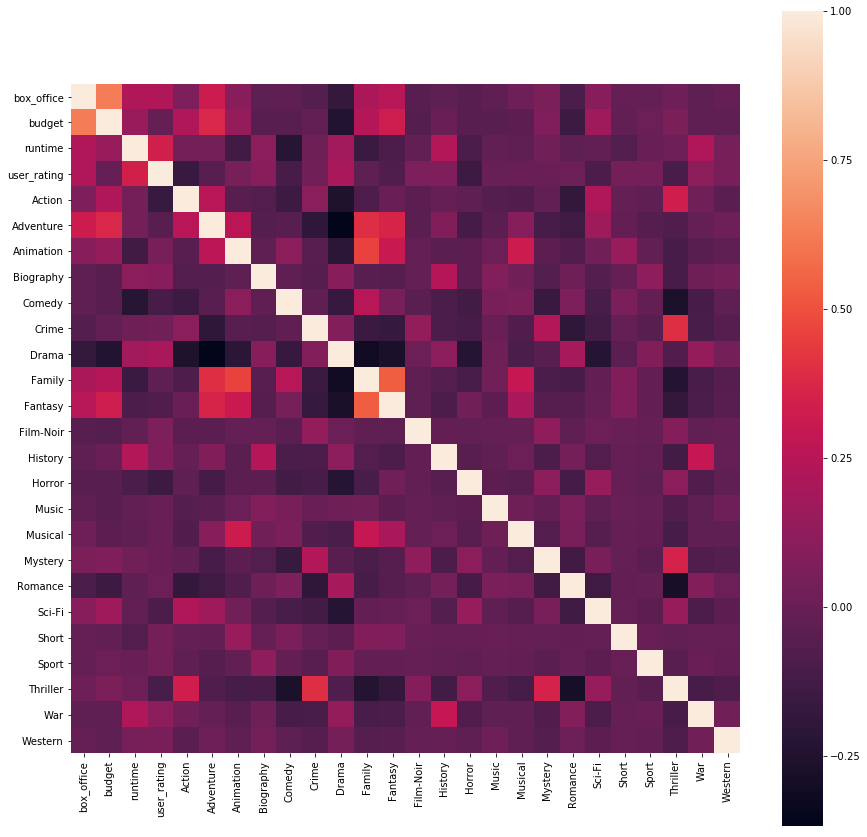

In [62]:
movie_corr = movie_numeric.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(movie_corr, square=True)

In [126]:
movie_corr

,box_office,budget,runtime,user_rating,Action,Adventure,Animation,Biography,Comedy,Crime,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
box_office,1.000000,0.626897,0.224877,0.224033,0.069150,0.319997,0.102111,-0.035210,-0.026631,-0.065641,...,-0.026815,0.017005,0.059850,-0.097402,0.099361,-0.009599,-0.010385,0.022215,-0.033740,-0.007402
budget,0.626897,1.000000,0.152196,-0.007670,0.223162,0.371048,0.141559,-0.055528,-0.056799,-0.023510,...,-0.055878,-0.040890,0.072841,-0.144124,0.172933,-0.022694,0.010298,0.064726,-0.026860,-0.034009
runtime,0.224877,0.152196,1.000000,0.340804,0.033821,0.036355,-0.130681,0.113538,-0.225732,0.015655,...,-0.023572,-0.028308,0.030654,-0.036360,-0.021646,-0.075967,-0.002982,0.019444,0.229814,0.047114
user_rating,0.224033,-0.007670,0.340804,1.000000,-0.164569,-0.054072,0.048772,0.099706,-0.111132,0.030326,...,-0.002543,0.004385,0.005524,0.011566,-0.093355,0.042803,0.039297,-0.105573,0.116624,0.051585
Action,0.069150,0.223162,0.033821,-0.164569,1.000000,0.254815,-0.053047,-0.072240,-0.149232,0.107202,...,-0.063648,-0.082684,-0.021884,-0.181609,0.223109,-0.013768,-0.028454,0.336859,0.023664,-0.044301
Adventure,0.319997,0.371048,0.036355,-0.054072,0.254815,1.000000,0.261598,-0.064860,-0.049716,-0.196825,...,-0.043938,0.094962,-0.106233,-0.140799,0.172972,-0.016167,-0.058596,-0.083035,-0.011130,0.020456
Animation,0.102111,0.141559,-0.130681,0.048772,-0.053047,0.261598,1.000000,-0.035026,0.109166,-0.053047,...,0.008825,0.320859,-0.040370,-0.082751,0.023312,0.153434,-0.020541,-0.113877,-0.050741,-0.030347
Biography,-0.035210,-0.055528,0.113538,0.099706,-0.072240,-0.064860,-0.035026,1.000000,-0.027774,-0.059391,...,0.085565,0.025097,-0.075866,0.012271,-0.063612,-0.005374,0.120355,-0.105936,0.011756,0.035166
Comedy,-0.026631,-0.056799,-0.225732,-0.111132,-0.149232,-0.049716,0.109166,-0.027774,1.000000,-0.029991,...,0.050550,0.061635,-0.160459,0.066827,-0.101742,0.054589,-0.018414,-0.269942,-0.108945,-0.031354
Crime,-0.065641,-0.023510,0.015655,0.030326,0.107202,-0.196825,-0.053047,-0.059391,-0.029991,1.000000,...,0.004090,-0.082684,0.233638,-0.201515,-0.126544,-0.013768,-0.049902,0.399683,-0.104899,-0.059012


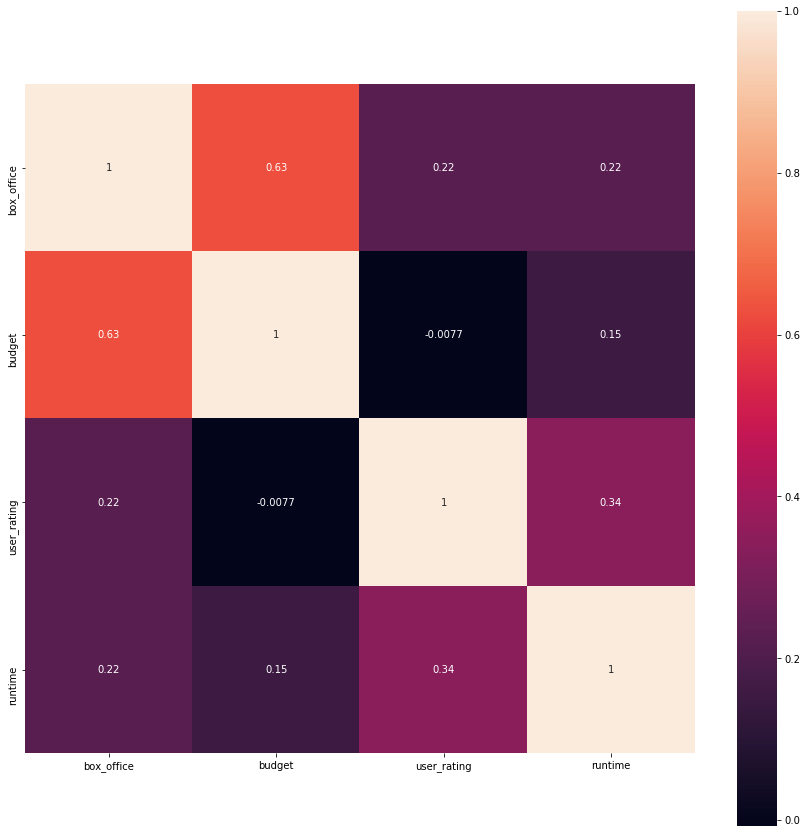

In [73]:
movie_corr = usMovieDF[['box_office','budget','user_rating','runtime']].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(movie_corr, square=True,annot=True)

In [1]:
# sns.jointplot('user_rating', 'box_office',movieDF, kind="reg")
# print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)

In [309]:
#movieDF[movieDF['budget'].str.contains('€')]
#movieDF.budget.value_counts()

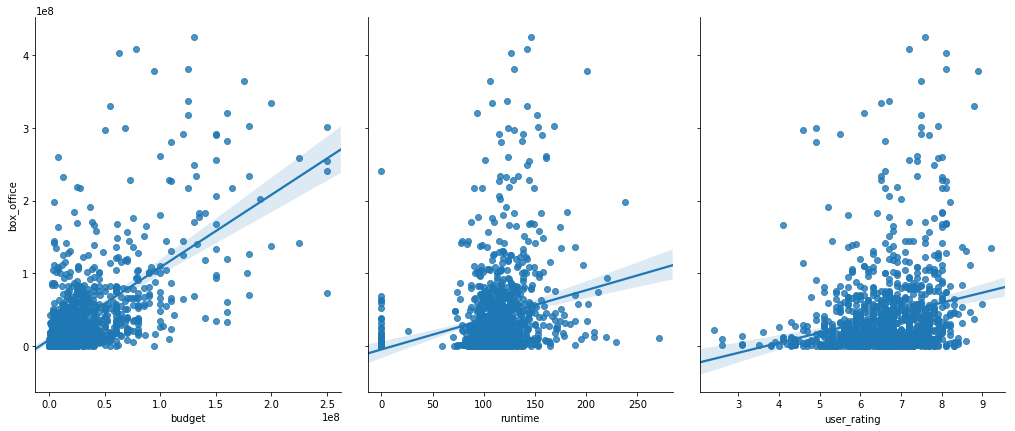

In [71]:
sns.pairplot(usMovieDF, x_vars=['budget','runtime', 'user_rating'], 
             y_vars='box_office', size=6, aspect=0.8, kind='reg')

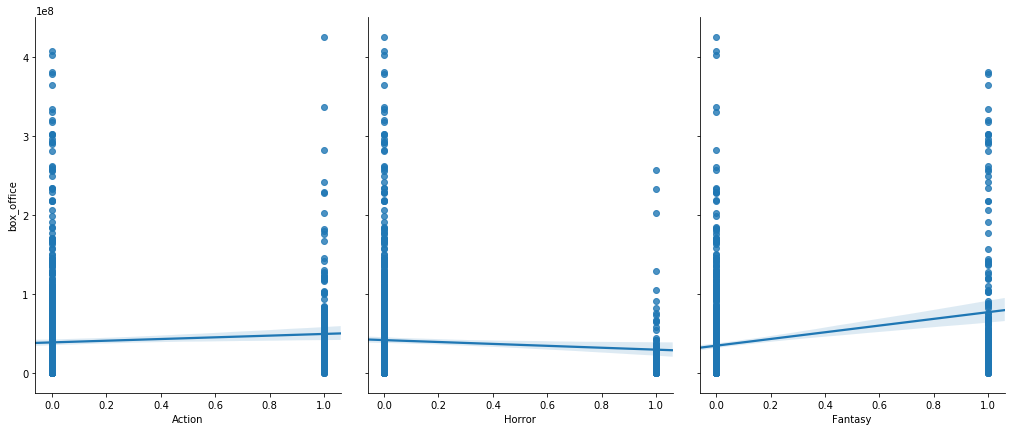

In [132]:
sns.pairplot(usMovieDF, x_vars=['Action','Horror', 'Fantasy'], 
             y_vars='box_office', size=6, aspect=0.8, kind='reg')

In [130]:
y= movie_numeric['box_office']
X=movie_numeric[['budget','runtime','user_rating']]

In [137]:
lr=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.41026284355552844